# Boston Housing Price Prediction 

## 1. Feature discription

### Remeber to split features and Dependant/Target Varible

* *CRIM*: per capita crime rate by town
* *ZN*: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS*: proportion of non-retail business acres per town
* *CHAS*: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* *NOX*: nitric oxides concentration (parts per 10 million)
* *RM*: average number of rooms per dwelling
* *AGE*: proportion of owner-occupied units built prior to 1940
* *DIS*: weighted distances to five Boston employment centers
* *RAD*: index of accessibility to radial highways
* *TAX*: full-value property-tax rate per $10,000

* *PTRATIO*: pupil-teacher ratio by town
* *B*: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
* *LSTAT*: % lower status of the population
* *MEDV*: Median value of owner-occupied homes in $1000’s

## 2. Import required Libraries

In [1]:
# data tranform and statistical operation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
""""magic command after using this, no need to use plt.show()
Without %matplotlib inline, you would need to use plt.show() after creating a plot to display
it. However, with this magic command, plots are automatically displayed when the cell is run."""
%matplotlib inline

import seaborn as sns
from pandas.plotting import scatter_matrix

# sampling and split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# imputation
from sklearn.impute import SimpleImputer

# pipeline
from sklearn.pipeline import Pipeline

# model selection, regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# normalization and scaling technique
from sklearn.preprocessing import StandardScaler

# model evaluation
from sklearn.metrics import mean_squared_error

## 3. take look at data

In [2]:
housing_df = pd.read_csv('boston.csv')

In [3]:
# take first look of data
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# target variable range

def target_variable_range(housing_df):
    range = housing_df["MEDV"].max() - housing_df["MEDV"].min()
    print("Range of the target variable 'MEDV' is:", range)

target_variable_range(housing_df)

Range of the target variable 'MEDV' is: 45.0


In [5]:
# information about data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# check for null values
# create funtion nan
def nan(housing_df):
    nan_counts = housing_df.isna().sum()
    for index, value in enumerate(nan_counts):
        if value > 0:
            print(f"Feature '{housing_df.columns[index]}' has '{value}' null values")

# pass the argument in defined function
nan(housing_df)

Feature 'RM' has '5' null values


In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282699,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704089,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
dup_counts = housing_df.duplicated().sum()
print(f"'{dup_counts}' duplicate values present")

'0' duplicate values present


* CHAS = 1: The tract of land is located along the Charles River.* 
CHAS = 0: The tract of land is not adjacent to the Charles River.

In [9]:
housing_df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
# housing.hist(bins=50, figsize=(20,15)) commentout just to avoid extra run time taken

### some insights from histplots
* MEDV: standard normal distribution
* RM: Standard normal distribution
* CHAS: yes '1' or no '0' values

## 4. Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)
print(f"Rows in train_set: {len(train_set)}\nRows in test_set: {len(test_set)}")

Rows in train_set: 404
Rows in test_set: 102


## 5. Stratified Sampling 
* StratifiedShuffleSplit

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(housing_df, housing_df["CHAS"]):
    strat_train_set = housing_df.iloc[train_index]
    strat_test_set = housing_df.iloc[test_index]

In [13]:
strat_train_set.shape

(404, 14)

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.304921,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.666113,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [16]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277088,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714051,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [18]:
strat_test_set["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [19]:
95/7

13.571428571428571

In [20]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [21]:
376/28

13.428571428571429

### Now save the train set into housing variable
* now onwards consider the training set as housing

In [22]:
# Considering the model training purpose, we will save strat_train_set into housing
housing = strat_train_set.copy()
housing.shape

(404, 14)

* Looking for correlation

In [23]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.677363
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

from above correlation matrix:
* RM has strong positive correlation with MEDV
* LSTAT has strong negative correlation with MEDV 

### Find correlation in train dataset

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='CHAS', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='LSTAT', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='AGE', ylabel='CHAS'>],
       [<Axes: xlabel='MEDV', ylabel='AGE'>,
        <Axes: xlabel='RM', ylabel='AGE'>,
 

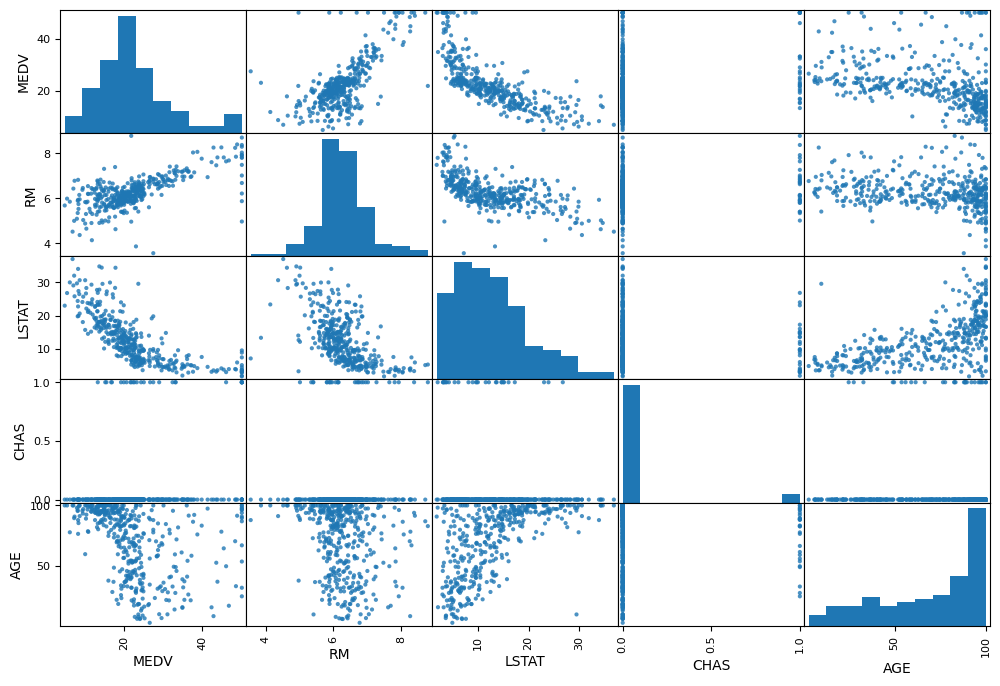

In [24]:
# lets plot the graph using pandas plotting
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","LSTAT","CHAS","AGE"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.8, color=None)


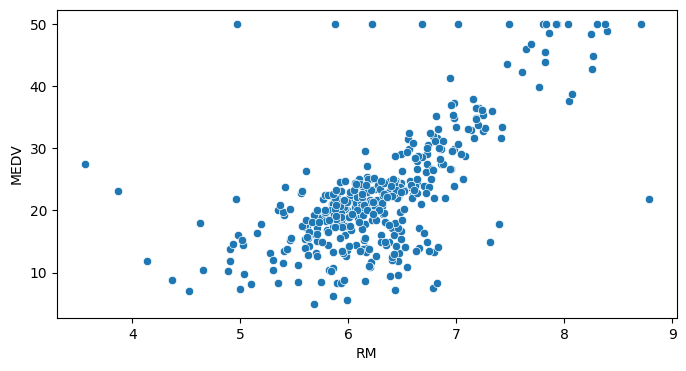

In [25]:
# It is clearly seen that RM and MEDV are strongly positive correlated
plt.figure(figsize=(8,4))
sns.scatterplot(x=housing["RM"], y=housing["MEDV"], alpha=None)
plt.show()

## 6. Separate the features and Dependant/Target varible from housing dataset.

In [26]:
housing_features = strat_train_set.drop("MEDV", axis=1)
housing_target_variable = strat_train_set["MEDV"].copy()

### Findout the missing values and impute them by using SimpleImputer

* findout the missingvalues

In [27]:
housing_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [28]:
# call the function nan to see the missing value
nan(housing_df)


Feature 'RM' has '5' null values


In [29]:
# findout the best method to impute
mean = housing_features["RM"].mean()
median = housing_features["RM"].median()
mode = housing_features["RM"].mode()

In [30]:
central_tendancy = pd.DataFrame({"Mean":[mean], "Median":[median], "Mode": [mode]})
central_tendancy

,Mean,Median,Mode
0,6.277088,6.21,0 5.713 1 6.127 2 6.229 3 6.417 Na...


In [31]:
central_tendancy.loc[:,"Mode"].value_counts()

Mode
[5.713, 6.127, 6.229, 6.417]    1
Name: count, dtype: int64

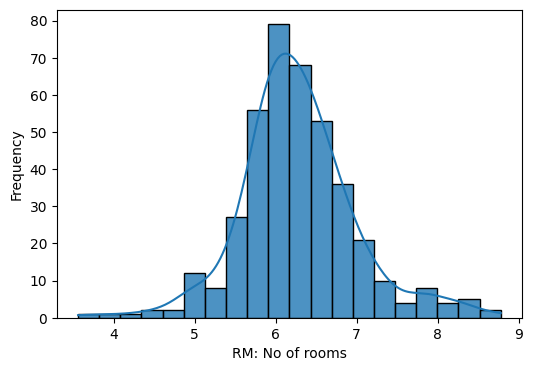

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(housing_features["RM"], bins=20, alpha=0.8, kde=True, color=None)
plt.ylabel("Frequency")
plt.xlabel("RM: No of rooms")
plt.show()

* from above distribution it is clear that the RM has the standard normal distributio and mean,median and mode has the nearly same values.


In [33]:
print("Count before Imputation: ",housing_features["RM"].count())


Count before Imputation:  400


## 7. Data Transform using Imputer Technique

In [34]:
from sklearn.impute import SimpleImputer
impute_median = SimpleImputer(strategy="median")


In [35]:
housing_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
# fit the housing dataset for median strategy
impute_median.fit(housing_features)

SimpleImputer(strategy='median')

In [37]:
# transform the housing dataset using median imputer
x = impute_median.transform(housing_features)
print(type(x))
x

<class 'numpy.ndarray'>


array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [38]:
# convert numpy array into a dataframe
housing_features_tr = pd.DataFrame(x, columns=housing_features.columns)


In [39]:
housing_features_tr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
housing_features_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [41]:
print("Count After Imputation: ", housing_features_tr["RM"].count())


Count After Imputation:  404


* Actualy this is the count of records present in the housing_tr dataframe. housing_tr dataset contains the records from training data.

## 8. Feature Scaling 

## 9. Pipeline

#### Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
     # add as many Estimators as you want...
    ("scaler", StandardScaler())
])

* here I am creating the pipline to impute the missing values, hence I am using housing dataset and not the housing_tr

In [43]:
# using pipeline all features are fit and transformed in housing_features_tr 
housing_features_tr = pipe.fit_transform(housing_features)


In [44]:
housing_features_tr = pd.DataFrame(housing_features_tr, columns=housing_features.columns)

In [45]:
housing_features_tr["RM"].count()

404

In [46]:
# check if dependant variable "MEDV" present 
housing_features_tr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

* Now I have transformed data and imputed the null values by imputer model and data is ready to apply some regression model to see which one fits the best. 

## 10. Selecting the desired Model

### 1. Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(housing_features_tr, housing_target_variable)

LinearRegression()

* housing_num_tr: contains 13 independant features, and
* housing_labels: contains  dependant/Target variable "MEDV"

In [48]:
prepared_data = pipe.transform(housing_features)

In [49]:
print(lin_model.predict(prepared_data).round(2))

[24.05 27.3  20.5  25.09 23.81 16.7  24.2  24.76 12.46 32.92 12.63 20.54
  3.65 29.79 20.39 15.09 20.87 17.34 12.29 20.23 18.75 13.38 17.48 15.
 27.2  29.04 12.12 23.59 15.2  32.46 13.28 18.77 13.4  20.18 15.68 24.66
 24.04 40.73 33.58 20.34 24.89 30.81 34.23  7.02 16.63  5.68 24.79 29.09
 24.22 -3.74 26.61 24.71 25.86 31.08 14.2  34.12 20.51 27.68 30.29 18.52
 19.97 18.95 28.82 23.14 11.45 32.65 38.02 13.78 28.03 34.43 27.37 35.96
 23.58 13.18 23.82 25.61 30.4  12.43 18.58 19.68 25.02 12.6  20.93 17.86
 25.11 19.83 30.46 25.27 32.45  1.24 28.97 25.35 31.3  20.75 20.78 28.94
 38.17 21.18 28.85 16.79 17.74 39.   23.89 36.81 18.57 15.78 20.54 25.51
 30.1  16.51 19.09  9.08 17.4  22.08 11.38 19.89 13.62 33.02 26.21 15.76
 24.47  8.29  9.58 22.19 25.6   8.25 18.38 24.58 16.09 23.1  25.12  8.51
 20.51  8.67 37.68 19.92 27.37 26.06 22.08 42.12 17.16 19.32 28.88 20.59
 30.59 16.63 21.39 19.35 19.51  3.27 21.4  17.36 36.68 18.34 27.59 16.02
 17.6  25.23 24.81 17.47 22.8  24.71 28.03 21.99 41.1

C:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
housing_target_variable

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

* At first look it seems result is not accurate.

In [51]:
# lets see the mean_squared_error

from sklearn.metrics import mean_squared_error
lin_housing_predictions = lin_model.predict(housing_features_tr).round(2)
lin_mse = mean_squared_error(housing_target_variable, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [52]:
print(f"Mean Squared Error is : {lin_mse}")
print(f"Root Mean Squared Error is : {lin_rmse}")

Mean Squared Error is : 23.53974084158416
Root Mean Squared Error is : 4.851777080780212


In [53]:
# lets check the target_variable_range, call function created.
target_variable_range(housing_df)

Range of the target variable 'MEDV' is: 45.0


### 2. Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(housing_features_tr, housing_target_variable)

DecisionTreeRegressor()

In [55]:
from sklearn.metrics import mean_squared_error
tree_housing_predictions = tree_model.predict(housing_features_tr)
tree_mse = mean_squared_error(housing_target_variable, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)


In [56]:
print(f"Mean Squared Error is : {tree_mse}")
print(f"Root Mean Squared Error is : {tree_rmse}")

Mean Squared Error is : 0.0
Root Mean Squared Error is : 0.0


* DecisionTreeRegressor giving the mse and rmse values as 0.
* This is called Overfitting!
* model has remebered all the values given and that I don't want
  

### 3. Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(housing_features_tr, housing_target_variable)

RandomForestRegressor()

In [58]:
forest_housing_predictions = forest_model.predict(housing_features_tr)

from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(housing_target_variable, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)

In [59]:
print(f"Mean Squared Error is : {forest_mse.round(4)}")
print(f"Root Mean Squared Error is : {forest_rmse.round(4)}")

Mean Squared Error is : 1.5495
Root Mean Squared Error is : 1.2448


In [60]:
forest_housing_predictions

array([22.205, 25.298, 16.651, 23.41 , 23.799, 16.888, 24.424, 26.614,
       10.479, 31.473, 15.886, 18.355, 10.88 , 34.184, 22.853, 13.734,
       18.716, 17.506,  7.014, 20.46 , 18.896, 16.831, 17.974, 25.98 ,
       24.378, 24.856, 13.892, 21.229, 14.725, 27.904, 14.635, 18.887,
       11.217, 13.186, 20.376, 27.407, 23.532, 48.067, 32.719, 19.55 ,
       22.198, 32.297, 36.644,  9.291, 20.224, 12.777, 21.385, 27.106,
       22.99 ,  7.769, 24.712, 23.299, 23.96 , 30.625, 15.03 , 37.64 ,
       21.758, 24.872, 33.78 , 17.517, 19.849, 19.631, 27.642, 20.911,
       14.387, 31.459, 49.658, 14.888, 26.792, 34.845, 22.617, 35.61 ,
       22.648, 10.264, 20.526, 27.591, 25.465, 15.096, 16.275, 18.92 ,
       30.291,  8.513, 19.7  , 18.849, 26.295, 23.88 , 30.053, 25.371,
       29.533, 16.997, 23.07 , 30.151, 28.24 , 20.068, 21.465, 33.386,
       31.583, 19.764, 23.168, 17.443, 12.621, 45.897, 20.275, 43.302,
       16.997, 15.796, 19.681, 21.649, 27.383, 16.93 , 16.887,  7.927,
      

In [61]:
housing_target_variable

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

* forestregressor giving the bestter result than other 2 models.

In [62]:
# cross validation
# create the dataframe of all models and validations

## 11. Using better evaluation technique- 
## Cross Validation

### 1. Cross validation for LinearRegression

In [63]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_model, housing_features_tr, housing_target_variable,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)


In [64]:
lin_rmse_score = list(lin_rmse_scores.round(4))
lin_rmse_mean = lin_rmse_scores.mean().round(4)
lin_rmse_std = lin_rmse_scores.std().round(4)


In [65]:
def print_lin_scores(lin_rmse_scores):
    print("Cross Validation for LinearRegression!\n")
    print("Linear Model RMSE scores: ", lin_rmse_score, "\n")
    print("Linear Model RMSE Mean: ", lin_rmse_mean)
    print("Linear Model RMSE std: ", lin_rmse_std)

print_lin_scores(lin_rmse_scores)

Cross Validation for LinearRegression!

Linear Model RMSE scores:  [4.1757, 4.3174, 5.0978, 3.8422, 5.3695, 4.4095, 7.4455, 5.6353, 4.1254, 6.0421] 

Linear Model RMSE Mean:  5.046
Linear Model RMSE std:  1.058


### 2. Cross validation for DecisionTreeRegressor

In [66]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_model, housing_features_tr, housing_target_variable,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [67]:
tree_rmse_score = tree_rmse_scores.round(4)
tree_rmse_mean = tree_rmse_scores.mean().round(4)
tree_rmse_std = tree_rmse_scores.std().round(4)


In [68]:
def print_tree_scores(tree_rmse_scores):
    print("Cross Validation for DecisionTreeRegressor!\n")
    print("Tree Model RMSE scores :", tree_rmse_score)
    print("Tree Model RMSE Mean :", tree_rmse_mean)
    print("Tree Model RMSE std: ", tree_rmse_std)
print_tree_scores(tree_rmse_scores)

Cross Validation for DecisionTreeRegressor!

Tree Model RMSE scores : [4.1498 5.7178 5.1891 4.0268 4.3321 4.024  7.4467 3.9563 3.5724 4.1442]
Tree Model RMSE Mean : 4.6559
Tree Model RMSE std:  1.1082


### 3. Cross validation for RandomForestRegressor

In [69]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_model, housing_features_tr, housing_target_variable,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [70]:
forest_rmse_score = forest_rmse_scores.round(4)
forest_rmse_mean = forest_rmse_scores.mean().round(4)
forest_rmse_std = forest_rmse_scores.std().round(4)


In [71]:
def print_forest_scores(forest_rmse_scores):
    print("Cross Validation for RandomForestRegressor!\n")
    print("Forest Model RMSE scores :", forest_rmse_score)
    print("Forest Model RMSE Mean :", forest_rmse_mean)
    print("Forest Model RMSE std: ", forest_rmse_std)
print_forest_scores(forest_rmse_scores)

Cross Validation for RandomForestRegressor!

Forest Model RMSE scores : [2.9058 2.9885 4.3718 2.4737 3.3373 2.8144 4.6897 3.6421 2.934  3.5526]
Forest Model RMSE Mean : 3.371
Forest Model RMSE std:  0.6721


### Convert the cross validation output of all model into DataFrame

In [72]:
model_scores = pd.DataFrame({"RegressionModel":["Linear", "DecisionTree", "RandomForest"],
                              "RMSE_mean":[lin_rmse_mean, tree_rmse_mean, forest_rmse_mean],
                                "std": [lin_rmse_std,tree_rmse_std,forest_rmse_std]})

In [73]:
model_scores.sort_values("RMSE_mean", ascending=True)

,RegressionModel,RMSE_mean,std
2,RandomForest,3.3710,0.6721
1,DecisionTree,4.6559,1.1082
0,Linear,5.0460,1.0580


## 12. Chose the correct model with lowest RMSE_mean

In [74]:
select_model = model_scores[model_scores["RMSE_mean"] == model_scores["RMSE_mean"].min()]
select_model

,RegressionModel,RMSE_mean,std
2,RandomForest,3.371,0.6721


* Hyperparameter Tuning (if needed):

Based on the cross-validation results, you might consider fine-tuning hyperparameters to improve model performance.
Grid search or randomized search can be used for this purpo

* Visualizations:

Create visualizations such as learning curves, residual plots, or feature importance plots to gain further insight

* Evaluate on Test Set:

Evaluate the final model on an independent test set to assess its generalization performance.

* Documentation and Reporting:

Document the chosen model, hyperparameters, and key findings.
Report the performance metrics and insights to stakeholders or team membe
rs.s.se.

## 13. Evaluate Model on TestSet

* RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
final_forest_model = RandomForestRegressor()
final_forest_model.fit(housing_features_tr, housing_target_variable)

RandomForestRegressor()

In [76]:
housing_test_features = strat_test_set.drop("MEDV", axis=1)
housing_test_target_variable = strat_test_set["MEDV"].copy()
 # prepared means, we are filling the null values and other transformation using the SimpleImputer
housing_test_features_prepared = pipe.transform(housing_test_features)
# make predictions of MEDV on the test_features
final_prediction = forest_model.predict(housing_test_features_prepared)
# find the MSE 
final_mse = mean_squared_error(housing_test_target_variable, final_prediction)
final_rmse = np.sqrt(final_mse)



C:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [77]:
final_prediction.round(1)

array([23.9, 11.5, 25.9, 22.2, 20.1, 15. , 20.3, 14.2, 31.3, 41.1, 19.6,
       12. , 23.4, 24.9, 19.6, 11. , 31.5, 14.5, 23.5, 19. , 19.9, 18.2,
       17. , 22.5, 18.2, 30.2, 15.8, 32.9,  9.1, 34.4, 24.3, 21.3, 23. ,
       10.6, 20.9, 11.4, 43.4, 24.9, 25.4, 42.3, 24.1, 28.5, 20.4, 20.8,
       19. , 33.2, 44.3, 20.2, 20.3, 22.6, 20.8, 14.7, 21.5, 15. , 24.4,
       32.5, 42. , 28.9, 19.2, 20.7, 46.2,  9.9, 18.8, 26.9, 14.6, 33.2,
       20. , 18. , 18.9, 33.4, 26.6, 22.8, 21.5, 22.5, 35. , 13. , 16.1,
       20.2, 21.1, 21.5, 22.3, 21.3, 14.1, 22.6, 20.5, 21.1, 14.1, 21. ,
       21.7, 23.4, 18.5, 27.2,  7.4, 25.7, 18.5, 29. , 19.7, 31.3, 14.8,
       27.9, 21. , 20.5])

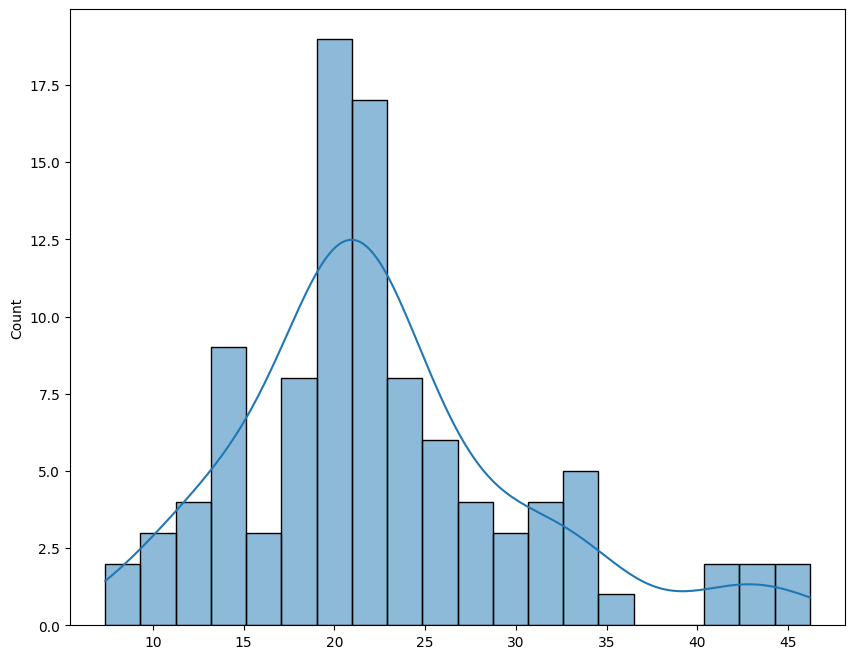

In [78]:
plt.figure(figsize=(10,8))
sns.histplot(final_prediction, bins=20, kde=True)
plt.show()

In [79]:
housing_test_target_variable

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

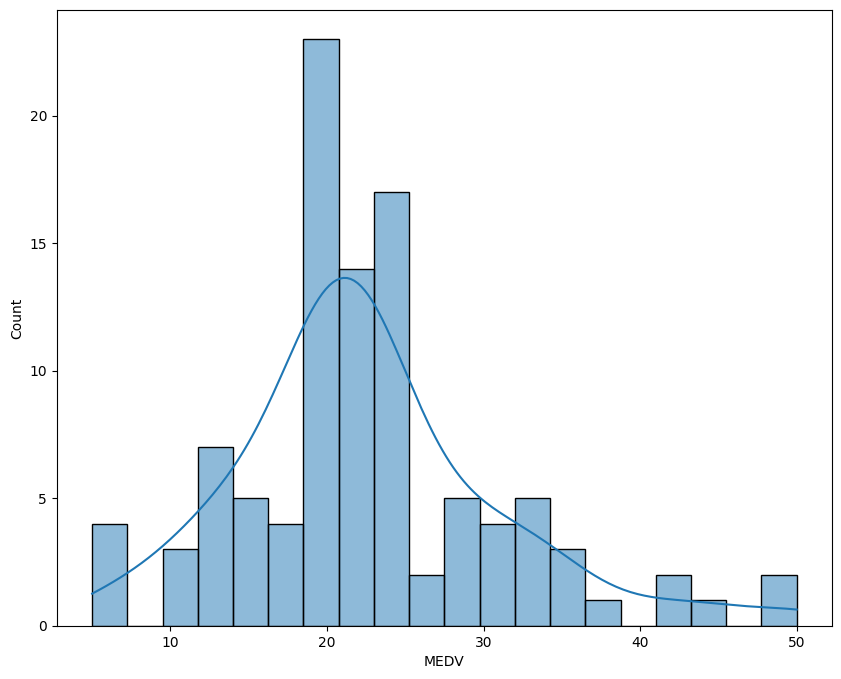

In [80]:
plt.figure(figsize=(10,8))
sns.histplot(housing_test_target_variable, bins=20, kde=True)
plt.show()

In [81]:
for i in (list(housing_test_features.columns)):
    print(i)


CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [82]:
print("final_mse:", final_mse)

final_mse: 8.438987215686275


In [83]:
print("final_rmse:", final_rmse)

final_rmse: 2.9049934966684994


## 14. Saving the model

In [84]:
# Saving the RandomForestRegressor

from joblib import dump, load
dump(forest_model, "BostonHousing.joblib")

['BostonHousing.joblib']